In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [2]:
lgbm = pd.read_csv("LGBM1.csv")
nb = pd.read_csv("NaiveBayes1.csv")
cb = pd.read_csv("CatBoost1.csv")
xgb = pd.read_csv("XGBoost1.csv")
dt = pd.read_csv("DecisionTree1.csv")
bgnb = pd.read_csv("BaggingNB1.csv")
bgdt = pd.read_csv("BaggingDT1.csv")
ada = pd.read_csv("AdaBoost1.csv")
rf = pd.read_csv("RandomForest1.csv")

In [3]:
test_public = pd.read_csv("task1_public_test_data.csv")
test_private = pd.read_csv("task1_private_test_data.csv")
test = pd.merge(test_private, test_public, how = "outer")

In [4]:
df = lgbm
df["CatBoost"] = cb.CatBoost
df["NaiveBayes"] = nb.NaiveBayes
df["XGBoost"] = xgb.XGBoost
df["DecisionTree"] = dt.DecisionTree
df["BaggingNB"] = bgnb.BaggingNB
df["BaggingDT"] = bgdt.BaggingDT
df["AdaBoost"] = ada.AdaBoost
df["RandomForest"] = rf.RandomForest
df

,LightGBM,CatBoost,NaiveBayes,XGBoost,DecisionTree,BaggingNB,BaggingDT,AdaBoost,RandomForest
0,1,1,1,1.0,1,1,1,1,1
1,1,1,1,1.0,1,1,1,1,1
2,1,1,1,1.0,1,1,1,1,1
3,1,1,1,1.0,1,1,1,1,1
4,1,1,1,1.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
3966958,1,1,1,1.0,1,1,1,1,1
3966959,1,1,1,1.0,1,1,1,1,1
3966960,1,1,1,1.0,1,1,1,1,1
3966961,1,1,1,1.0,1,1,1,1,1


In [27]:
modelsWeight = {
    "LightGBM": 1,
    "CatBoost": 1,
    # "NaiveBayes": 1,
    # "BaggingNB": 1,
    # "XGBoost": 1,
    # "DecisionTree": 1,
    # "BaggingDT": 1,
    # "AdaBoost": 1,
    "RandomForest": 1
}
    
def vote(row, i) :
    count = 0
    for key, value in modelsWeight.items():
        if row[key] == i :
            count += value
    return count

def finalAnswer(row) :
    return 0 if row["Zero"] > row["One"] else 1

df["Zero"] = df.apply(lambda row: vote(row, 0), axis=1)
df["One"] = df.apply(lambda row: vote(row, 1), axis=1)
df["HardVotePrediction"] = df.apply(lambda row: finalAnswer(row), axis=1)

In [19]:
modelsProb = {
    "LightGBM": 74.17,
    "CatBoost": 73.02,
    # "NaiveBayes": 62.8,
    "BaggingNB": 62.81,
    "XGBoost": 73.02,
    "DecisionTree": 72.83,
    "BaggingDT": 73.17,
    "AdaBoost": 72.95,
    "RandomForest": 72.91
}

def softVote(row, i) :
    percent = 0
    count = 0
    for key, value in modelsProb.items():
        if row[key] == i :
            percent += value
            count += 1
    return 0 if count == 0 else percent / count

df["ZeroProbability"] = df.apply(lambda row: softVote(row, 0), axis=1)
df["OneProbability"] = df.apply(lambda row: softVote(row, 0), axis=1)
df["SoftVotePrediction"] = df.apply(lambda row: 0 if row["ZeroProbability"] > row["OneProbability"] else 1, axis=1)

In [20]:
df["IsCorrect"] = test["IsCorrect"]

In [28]:
print('Hard Voting ', accuracy_score(df["IsCorrect"], df["HardVotePrediction"]))
print('Soft Voting ', accuracy_score(df["IsCorrect"], df["SoftVotePrediction"]))

Hard Voting  0.7336985497469979
Soft Voting  0.6430617074069005


In [29]:
print(classification_report(df["IsCorrect"], df["HardVotePrediction"], target_names=["Wrong Answer", "Correct Answer"]))

                precision    recall  f1-score   support

  Wrong Answer       0.66      0.53      0.59   1415961
Correct Answer       0.77      0.85      0.80   2551002

      accuracy                           0.73   3966963
     macro avg       0.71      0.69      0.70   3966963
  weighted avg       0.73      0.73      0.73   3966963



In [23]:
print(classification_report(df["IsCorrect"], df["SoftVotePrediction"], target_names=["Wrong Answer", "Correct Answer"]))

/Users/mohammadabdulah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammadabdulah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  Wrong Answer       0.00      0.00      0.00   1415961
Correct Answer       0.64      1.00      0.78   2551002

      accuracy                           0.64   3966963
     macro avg       0.32      0.50      0.39   3966963
  weighted avg       0.41      0.64      0.50   3966963



/Users/mohammadabdulah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__________

<AxesSubplot:>

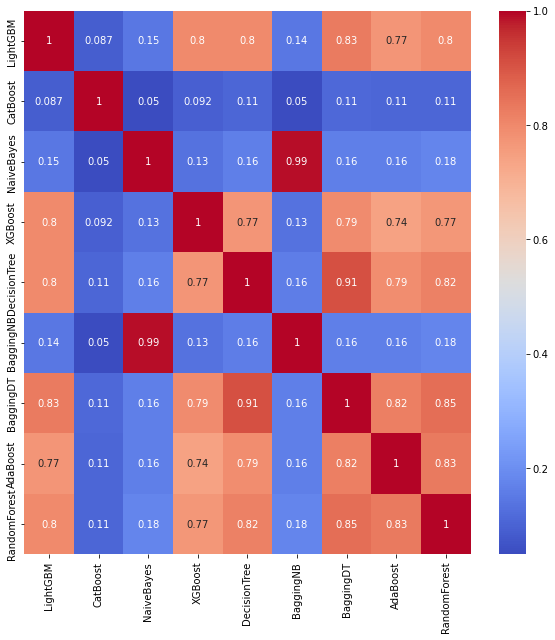

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:>

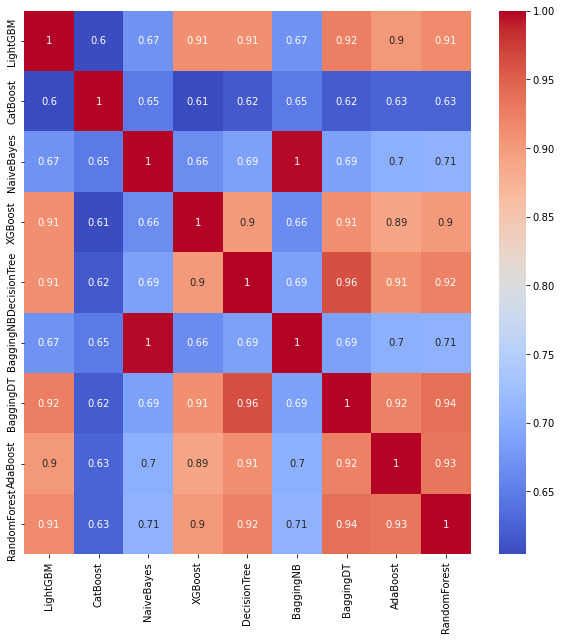

In [35]:
columns = [
    "LightGBM", "CatBoost", "NaiveBayes",
    "XGBoost", "DecisionTree", "BaggingNB",
    "BaggingDT", "AdaBoost", "RandomForest"
]
similarity = []

for i in range(0, len(columns)):
    row = []
    for j in range(0, len(columns)):
        row.append(accuracy_score(df[columns[i]], df[columns[j]]))
    similarity.append(row)

similarityDf = pd.DataFrame(similarity, columns=columns, index=columns)
plt.figure(figsize=(10, 10))
sns.heatmap(similarityDf, annot=True, cmap="coolwarm")

<AxesSubplot:>

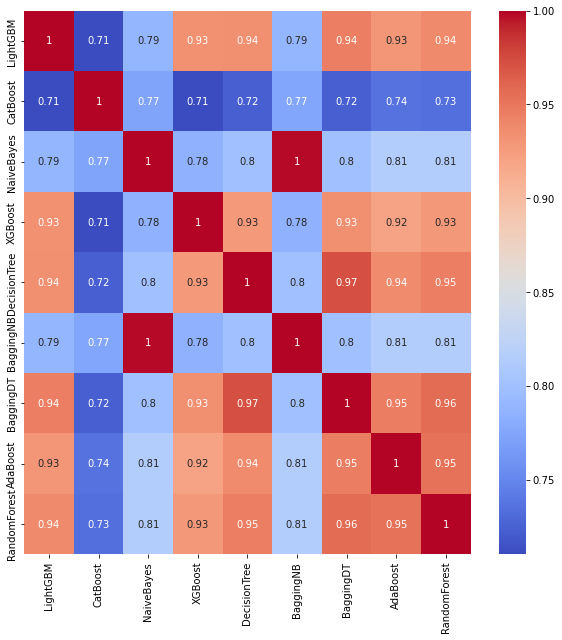

In [30]:
columns = [
    "LightGBM", "CatBoost", "NaiveBayes",
    "XGBoost", "DecisionTree", "BaggingNB",
    "BaggingDT", "AdaBoost", "RandomForest"
]
cosineSimilarity = []

for i in range(0, len(columns)):
    row = []
    for j in range(0, len(columns)):
        row.append(1 - spatial.distance.cosine(df[columns[i]], df[columns[j]]))
    cosineSimilarity.append(row)

cosineSimilarityDf = pd.DataFrame(cosineSimilarity, columns=columns, index=columns)
plt.figure(figsize=(10, 10))
sns.heatmap(cosineSimilarityDf, annot=True, cmap="coolwarm")